In [15]:
import pandas as pd
import numpy as np

# Set random seed for reproducibility
np.random.seed(42)

# Number of days
n_days = 500

# Create a date range
dates = pd.date_range(start="2020-01-01", periods=n_days, freq="B")  # business days

# Simulate daily returns (normal distribution)
returns = np.random.normal(loc=0.0005, scale=0.02, size=n_days)  # mean=0.05% daily, vol=2%

# Generate price series starting at 100
price = 100 * (1 + pd.Series(returns)).cumprod()

# Create DataFrame
daily_df = pd.DataFrame({
    "date": dates,
    "return": returns,
    "price": price
})

# Save to CSV
data_folder = r"C:\Users\loyas\Notebooks"
daily_df.to_csv(data_folder + r"\simulated_daily_data.csv", index=False)

print("File created at:", data_folder)
print(daily_df.head())


File created at: C:\Users\loyas\Notebooks
        date    return       price
0 2020-01-01  0.010434  101.043428
1 2020-01-02 -0.002265  100.814536
2 2020-01-03  0.013454  102.170872
3 2020-01-06  0.030961  105.334143
4 2020-01-07 -0.004183  104.893523


In [37]:
import pandas as pd
import numpy as np
import os

# Where to save
data_folder = r"C:\Users\loyas\Notebooks"

# Parameters
n_days = 5             # how many days of data you want
intervals_per_day = 78 # 6.5 trading hours * 12 intervals/hour = 78
n_points = n_days * intervals_per_day

# Date range (5-minute intervals during trading hours)
date_rng = pd.date_range(start="2025-01-01 09:30", periods=n_points, freq="5min")

# Simulate returns
np.random.seed(42)
returns = np.random.normal(loc=0.0001, scale=0.001, size=n_points)

# Build price series
price = 100 * (1 + pd.Series(returns)).cumprod()

# DataFrame
intraday_5min_df = pd.DataFrame({
    "datetime": date_rng,
    "return": returns,
    "price": price
})

# Save
file_path = os.path.join(data_folder, "simulated_5m_data.csv")
intraday_5min_df.to_csv(file_path, index=False)

print("5-minute data saved to:", file_path)
print(intraday_5min_df.head())


5-minute data saved to: C:\Users\loyas\Notebooks\simulated_5m_data.csv
             datetime    return       price
0 2025-01-01 09:30:00  0.000597  100.059671
1 2025-01-01 09:35:00 -0.000038  100.055843
2 2025-01-01 09:40:00  0.000748  100.130653
3 2025-01-01 09:45:00  0.001623  100.293168
4 2025-01-01 09:50:00 -0.000134  100.279714


In [49]:
import matplotlib.pyplot as plt
from arch import arch_model
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

data_folder = r'C:\Users\loyas\Notebooks'

daily_df = pd.read_csv(os.path.join(data_folder, 'simulated_daily_data.csv'))

daily_df['date'] = pd.to_datetime(daily_df['date'])

daily_df = daily_df.set_index('date')

daily_df['log_ret'] = np.log(daily_df['price']).diff()

intraday_5min_df = pd.read_csv(os.path.join(data_folder, 'simulated_5m_data.csv'))
intraday_5min_df['datetime'] = pd.to_datetime(intraday_5min_df['datetime'])
intraday_5min_df['date'] = intraday_5min_df['datetime'].dt.normalize()  # YYYY-MM-DD
intraday_5min_df = intraday_5min_df.set_index('datetime')



intraday_5min_df


,return,price,date
datetime,,,
2025-01-01 09:30:00,0.000597,100.059671,2025-01-01
2025-01-01 09:35:00,-0.000038,100.055843,2025-01-01
2025-01-01 09:40:00,0.000748,100.130653,2025-01-01
2025-01-01 09:45:00,0.001623,100.293168,2025-01-01
2025-01-01 09:50:00,-0.000134,100.279714,2025-01-01
...,...,...,...
2025-01-02 17:35:00,0.000250,104.422191,2025-01-02
2025-01-02 17:40:00,0.000442,104.468320,2025-01-02
2025-01-02 17:45:00,0.001976,104.674768,2025-01-02


2020-09-09 00:00:00
2020-09-10 00:00:00
2020-09-11 00:00:00
2020-09-14 00:00:00
2020-09-15 00:00:00
2020-09-16 00:00:00
2020-09-17 00:00:00
2020-09-18 00:00:00
2020-09-21 00:00:00
2020-09-22 00:00:00
2020-09-23 00:00:00
2020-09-24 00:00:00
2020-09-25 00:00:00
2020-09-28 00:00:00
2020-09-29 00:00:00
2020-09-30 00:00:00
2020-10-01 00:00:00
2020-10-02 00:00:00
2020-10-05 00:00:00
2020-10-06 00:00:00
2020-10-07 00:00:00
2020-10-08 00:00:00
2020-10-09 00:00:00
2020-10-12 00:00:00
2020-10-13 00:00:00
2020-10-14 00:00:00
2020-10-15 00:00:00
2020-10-16 00:00:00
2020-10-19 00:00:00
2020-10-20 00:00:00
2020-10-21 00:00:00
2020-10-22 00:00:00
2020-10-23 00:00:00
2020-10-26 00:00:00
2020-10-27 00:00:00
2020-10-28 00:00:00
2020-10-29 00:00:00
2020-10-30 00:00:00
2020-11-02 00:00:00
2020-11-03 00:00:00
2020-11-04 00:00:00
2020-11-05 00:00:00
2020-11-06 00:00:00
2020-11-09 00:00:00
2020-11-10 00:00:00
2020-11-11 00:00:00
2020-11-12 00:00:00
2020-11-13 00:00:00
2020-11-16 00:00:00
2020-11-17 00:00:00


C:\Users\loyas\anaconda3\envs\Conda\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\loyas\anaconda3\envs\Conda\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2020-12-09 00:00:00
2020-12-10 00:00:00
2020-12-11 00:00:00
2020-12-14 00:00:00
2020-12-15 00:00:00
2020-12-16 00:00:00
2020-12-17 00:00:00
2020-12-18 00:00:00
2020-12-21 00:00:00
2020-12-22 00:00:00
2020-12-23 00:00:00
2020-12-24 00:00:00
2020-12-25 00:00:00
2020-12-28 00:00:00
2020-12-29 00:00:00
2020-12-30 00:00:00
2020-12-31 00:00:00


C:\Users\loyas\anaconda3\envs\Conda\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-01-01 00:00:00
2021-01-04 00:00:00
2021-01-05 00:00:00
2021-01-06 00:00:00
2021-01-07 00:00:00
2021-01-08 00:00:00
2021-01-11 00:00:00
2021-01-12 00:00:00
2021-01-13 00:00:00
2021-01-14 00:00:00
2021-01-15 00:00:00
2021-01-18 00:00:00
2021-01-19 00:00:00
2021-01-20 00:00:00
2021-01-21 00:00:00
2021-01-22 00:00:00
2021-01-25 00:00:00
2021-01-26 00:00:00
2021-01-27 00:00:00
2021-01-28 00:00:00
2021-01-29 00:00:00
2021-02-01 00:00:00
2021-02-02 00:00:00
2021-02-03 00:00:00
2021-02-04 00:00:00
2021-02-05 00:00:00
2021-02-08 00:00:00
2021-02-09 00:00:00
2021-02-10 00:00:00
2021-02-11 00:00:00
2021-02-12 00:00:00
2021-02-15 00:00:00
2021-02-16 00:00:00
2021-02-17 00:00:00
2021-02-18 00:00:00
2021-02-19 00:00:00
2021-02-22 00:00:00
2021-02-23 00:00:00


C:\Users\loyas\anaconda3\envs\Conda\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(
C:\Users\loyas\anaconda3\envs\Conda\Lib\site-packages\arch\univariate\base.py:768: ConvergenceWarning: The optimizer returned code 8. The message is:
Positive directional derivative for linesearch
See scipy.optimize.fmin_slsqp for code meaning.

  warnings.warn(


2021-02-24 00:00:00
2021-02-25 00:00:00
2021-02-26 00:00:00
2021-03-01 00:00:00
2021-03-02 00:00:00
2021-03-03 00:00:00
2021-03-04 00:00:00
2021-03-05 00:00:00
2021-03-08 00:00:00
2021-03-09 00:00:00
2021-03-10 00:00:00
2021-03-11 00:00:00
2021-03-12 00:00:00
2021-03-15 00:00:00
2021-03-16 00:00:00
2021-03-17 00:00:00
2021-03-18 00:00:00
2021-03-19 00:00:00
2021-03-22 00:00:00
2021-03-23 00:00:00
2021-03-24 00:00:00
2021-03-25 00:00:00
2021-03-26 00:00:00
2021-03-29 00:00:00
2021-03-30 00:00:00
2021-03-31 00:00:00
2021-04-01 00:00:00
2021-04-02 00:00:00
2021-04-05 00:00:00
2021-04-06 00:00:00
2021-04-07 00:00:00
2021-04-08 00:00:00
2021-04-09 00:00:00
2021-04-12 00:00:00
2021-04-13 00:00:00
2021-04-14 00:00:00
2021-04-15 00:00:00
2021-04-16 00:00:00
2021-04-19 00:00:00
2021-04-20 00:00:00
2021-04-21 00:00:00
2021-04-22 00:00:00
2021-04-23 00:00:00
2021-04-26 00:00:00
2021-04-27 00:00:00
2021-04-28 00:00:00
2021-04-29 00:00:00
2021-04-30 00:00:00
2021-05-03 00:00:00
2021-05-04 00:00:00


,return,price,log_ret,variance,predictions
date,,,,,
2020-01-01,0.010434,101.043428,NaN,NaN,NaN
2020-01-02,-0.002265,100.814536,-0.002268,NaN,NaN
2020-01-03,0.013454,102.170872,0.013364,NaN,NaN
2020-01-06,0.030961,105.334143,0.030491,NaN,NaN
2020-01-07,-0.004183,104.893523,-0.004192,NaN,NaN
...,...,...,...,...,...
2021-11-24,0.011278,133.766905,0.011215,0.000397,0.000510
2021-11-25,-0.020245,131.058804,-0.020453,0.000398,0.000548
2021-11-26,-0.003307,130.625422,-0.003312,0.000398,0.000524


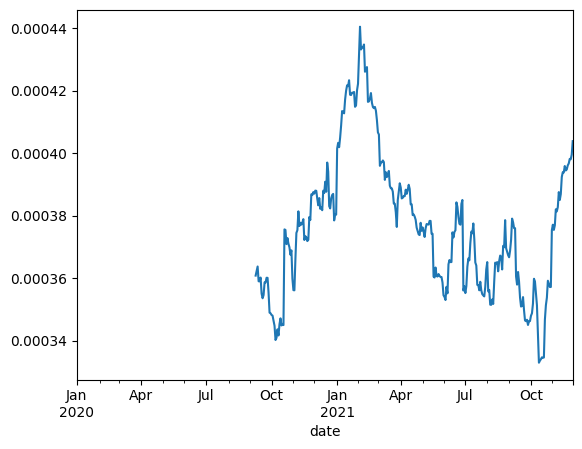

In [65]:
daily_df['variance'] = daily_df['log_ret'].rolling(180).var()

daily_df['variance'].plot()

def predict_volatility(x): 
    best_model = arch_model(y=x,
                            p=1,
                            q=3).fit(update_freq=5, disp='off')
    variance_forcast = best_model.forecast(horizon=1).variance.iloc[-1, 0] 

    print(x.index[-1])

    return variance_forcast

daily_df['predictions'] = daily_df['log_ret'].rolling(180).apply(lambda x: predict_volatility(x))

daily_df
                            

In [113]:
daily_df['prediction_premium'] = (daily_df ['predictions']-daily_df['variance'])/daily_df['variance']

daily_df['premium_std'] = daily_df['prediction_premium'].rolling(180).std()

daily_df['signal_daily'] = daily_df.apply(lambda x: 1 if (x['prediction_premium']>x['premium_std']*1.5)
                                         else (-1 if (x['prediction_premium']>x['premium_std']*1.5)else np.nan),
                                          axis=1)


daily_df['signal_daily']   = daily_df['signal_daily'].shift()

daily_df

,return,price,log_ret,variance,predictions,prediction_premium,premium_std,signal_daily
date,,,,,,,,
2020-01-01,0.010434,101.043428,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-02,-0.002265,100.814536,-0.002268,NaN,NaN,NaN,NaN,NaN
2020-01-03,0.013454,102.170872,0.013364,NaN,NaN,NaN,NaN,NaN
2020-01-06,0.030961,105.334143,0.030491,NaN,NaN,NaN,NaN,NaN
2020-01-07,-0.004183,104.893523,-0.004192,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2021-11-24,0.011278,133.766905,0.011215,0.000397,0.000510,0.284907,0.201224,1.0
2021-11-25,-0.020245,131.058804,-0.020453,0.000398,0.000548,0.377084,0.202442,NaN
2021-11-26,-0.003307,130.625422,-0.003312,0.000398,0.000524,0.317160,0.203174,1.0


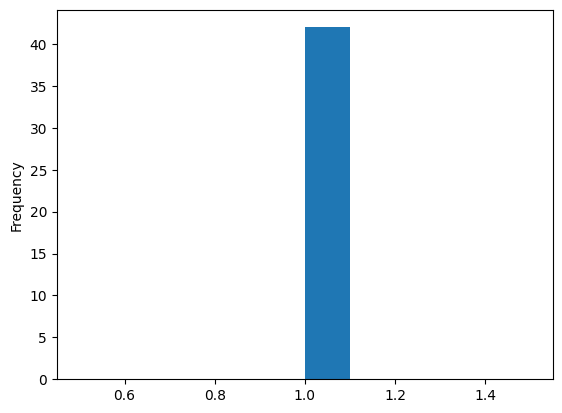

In [115]:
daily_df['signal_daily'].plot(kind='hist')

plt.show()

In [227]:
# Keep your merged final_df first...
final_df = (
    intraday_5min_df.reset_index()
    .merge(daily_df[['signal_daily']].reset_index(), on='date', how='left')
    .set_index('datetime')
).drop(columns=['date'])

# make sure we have a 'close' column
final_df = final_df.rename(columns={'price': 'close'})

# --- indicators without pandas_ta/numba ---

def rsi_wilder(close: pd.Series, length: int = 20) -> pd.Series:
    delta = close.diff()
    up = delta.clip(lower=0)
    down = -delta.clip(upper=0)
    avg_gain = up.ewm(alpha=1/length, adjust=False, min_periods=length).mean()
    avg_loss = down.ewm(alpha=1/length, adjust=False, min_periods=length).mean()
    rs = avg_gain / avg_loss
    return 100 - (100 / (1 + rs))

def bbands(close: pd.Series, length: int = 20, n_std: float = 2.0):
    ma = close.rolling(length, min_periods=length).mean()
    sd = close.rolling(length, min_periods=length).std(ddof=0)
    upper = ma + n_std * sd
    lower = ma - n_std * sd
    return lower, ma, upper

final_df['rsi'] = rsi_wilder(final_df['close'], 20)
final_df['lband'], final_df['mband'], final_df['uband'] = bbands(final_df['close'], 20, 2)

print(final_df[['close','signal_daily','rsi','lband','uband']].tail())

final_df['signal_intraday'] = final_df.apply(
    lambda row: 1  if (row['rsi'] > 60) and (row['close'] > row['uband'])
           else (-1 if (row['rsi'] < 40) and (row['close'] < row['lband']) else np.nan),
    axis=1
)

final_df


                          close  signal_daily        rsi       lband  \
datetime                                                               
2025-01-02 17:35:00  104.422191           NaN  56.409404  103.879773   
2025-01-02 17:40:00  104.468320           NaN  57.711922  103.923876   
2025-01-02 17:45:00  104.674768           NaN  62.930142  103.972751   
2025-01-02 17:50:00  104.784720           NaN  65.328690  104.020881   
2025-01-02 17:55:00  104.734748           NaN  63.367181  104.098682   

                          uband  
datetime                         
2025-01-02 17:35:00  104.995281  
2025-01-02 17:40:00  104.990033  
2025-01-02 17:45:00  104.999486  
2025-01-02 17:50:00  105.018621  
2025-01-02 17:55:00  105.010095  


,return,close,signal_daily,rsi,lband,mband,uband,signal_intraday
datetime,,,,,,,,
2025-01-01 09:30:00,0.000597,100.059671,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 09:35:00,-0.000038,100.055843,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 09:40:00,0.000748,100.130653,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 09:45:00,0.001623,100.293168,NaN,NaN,NaN,NaN,NaN,NaN
2025-01-01 09:50:00,-0.000134,100.279714,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
2025-01-02 17:35:00,0.000250,104.422191,NaN,56.409404,103.879773,104.437527,104.995281,NaN
2025-01-02 17:40:00,0.000442,104.468320,NaN,57.711922,103.923876,104.456954,104.990033,NaN
2025-01-02 17:45:00,0.001976,104.674768,NaN,62.930142,103.972751,104.486118,104.999486,NaN


In [229]:
final_df['return_signal'] = final_df.apply(
    lambda row: (-1 if (row['signal_daily'] == 1 and row['signal_intraday'] == 1)
                 else (1 if (row['signal_daily'] == 1 and row['signal_intraday'] == -1) else np.nan)),
    axis=1
)

final_df['return_signal'] = final_df.groupby(pd.Grouper(freq='D'))['return_signal']\
                                    .transform(
                                        lambda x: x.ffill())

final_df['return'] = final_df['close'].pct_change()

final_df['forward_return'] = final_df['return'].shift(-1)

final_df['strategy_return'] = final_df['forward_return'] * final_df['return_signal']

daily_return_df = final_df.groupby(pd.Grouper(freq='D'))[['strategy_return']].sum()


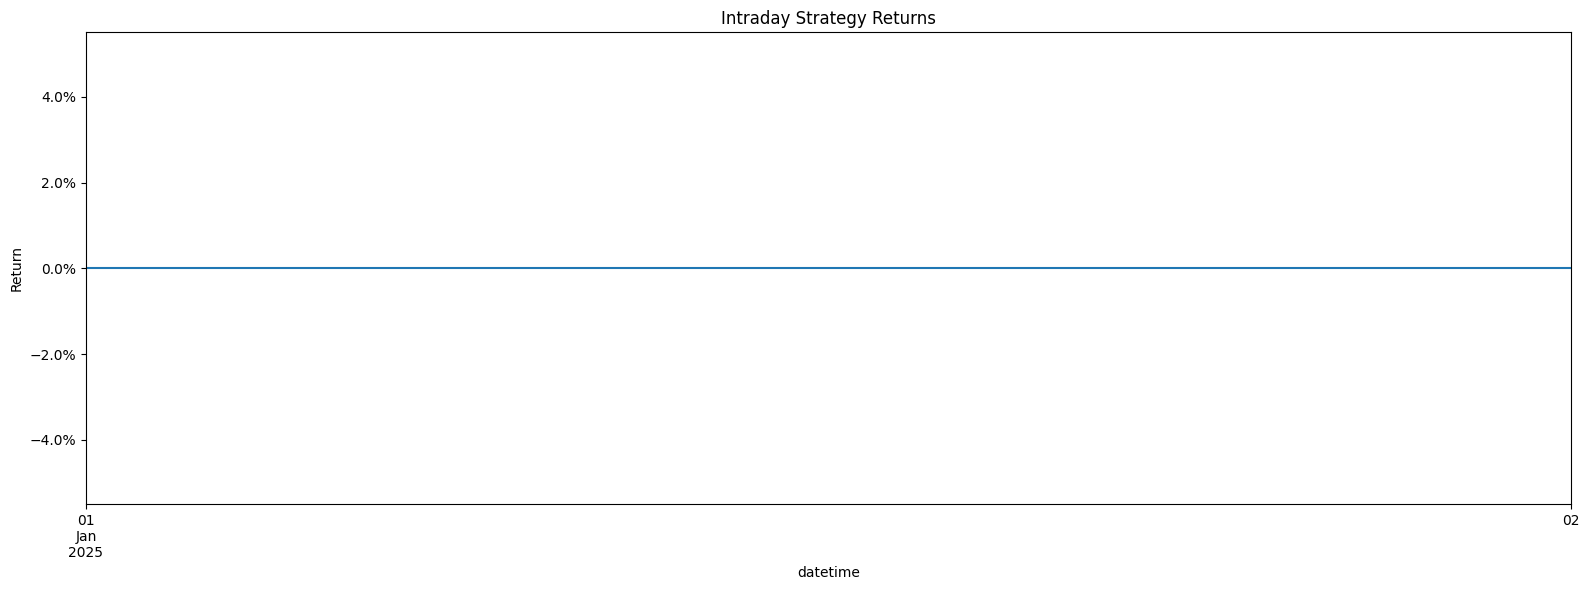

In [231]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# use the strategy return series
sr = daily_return_df['strategy_return'].astype(float)

# cumulative return: (1+r).cumprod() - 1   (equivalent to your log/exp version)
strategy_cumulative_return = (1 + sr).cumprod() - 1

ax = strategy_cumulative_return.plot(figsize=(16, 6), title='Intraday Strategy Returns')
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
ax.set_ylabel('Return')

plt.tight_layout()
plt.show()
